## Importing the Libraries

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install ipywidgets

  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: traitlets
    Found existing installation: traitlets 4.3.3
    Uninstalling traitlets-4.3.3:
      Successfully uninstalled traitlets-4.3.3
  Attempting uninstall: tornado
    Found existing installation: tornado 4.5.3
    Uninstalling tornado-4.5.3:
      Successfully uninstalled tornado-4.5.3
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [6]:
# basic operations
import numpy as np

# for dataframe manipulations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for missing values
import missingno as mno

# for date time manipulation
import datetime

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

**Reading the Data**

In [7]:
# reading the data and also checking the computation time
%time data = pd.read_csv('data.csv')

# lets also check the shape of the dataset
print(data.shape)

Wall time: 2.96 s
(18207, 89)


In [8]:
# lets check the column names present in the data
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [11]:
pd.set_option('max_columns',100)
data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

In [13]:
data.iloc[:,2:].describe().style.background_gradient(cmap='cividis')

In [14]:
data.describe(include='object')

Name                                           Photo  \
count          18207                                           18207   
unique         17194                                           18207   
top     J. Rodríguez  https://cdn.sofifa.org/players/4/19/237655.png   
freq              11                                               1   

       Nationality                                 Flag             Club  \
count        18207                                18207            17966   
unique         164                                  164              651   
top        England  https://cdn.sofifa.org/flags/14.png  Atlético Madrid   
freq          1662                                 1662               33   

                                           Club Logo  Value   Wage  \
count                                          18207  18207  18207   
unique                                           679    217    144   
top     https://cdn.sofifa.org/teams/2/light/240.png  €1.1M    €1K   
freq                                              33    431   4900   

       Preferred Foot       Work Rate Body Type Real Face Position  \
count           18159           18159     18159     18159    18147   
unique              2               9        10         2       27   
top             Right  Medium/ Medium    Normal        No       ST   
freq            13948            9810     10595     16505     2152   

             Joined Loaned From Contract Valid Until Height  Weight     LS  \
count         16654        1264                17918  18159   18159  16122   
unique         1736         341                   36     21      57     93   
top     Jul 1, 2018    Atalanta                 2019    6'0  165lbs   61+2   
freq           1538          20                 4819   2881    1483    705   

           ST     RS     LW     LF     CF     RF     RW    LAM    CAM    RAM  \
count   16122  16122  16122  16122  16122  16122  16122  16122  16122  16122   
unique     93     93    105    102    102    102    105    101    101    101   
top      61+2   61+2   63+2   61+2   61+2   61+2   63+2   61+2   61+2   61+2   
freq      705    705    745    713    713    713    745    744    744    744   

           LM    LCM     CM    RCM     RM    LWB    LDM    CDM    RDM    RWB  \
count   16122  16122  16122  16122  16122  16122  16122  16122  16122  16122   
unique    100     92     92     92    100     95     99     99     99     95   
top      61+2   58+2   58+2   58+2   61+2   61+2   62+2   62+2   62+2   61+2   
freq      804    762    762    762    804    713    660    660    660    713   

           LB    LCB     CB    RCB     RB Release Clause  
count   16122  16122  16122  16122  16122          16643  
unique     98    108    108    108     98           1244  
top      61+2   63+2   63+2   63+2   61+2          €1.1M  
freq      669    634    634    634    669            557

## Cleaning Data

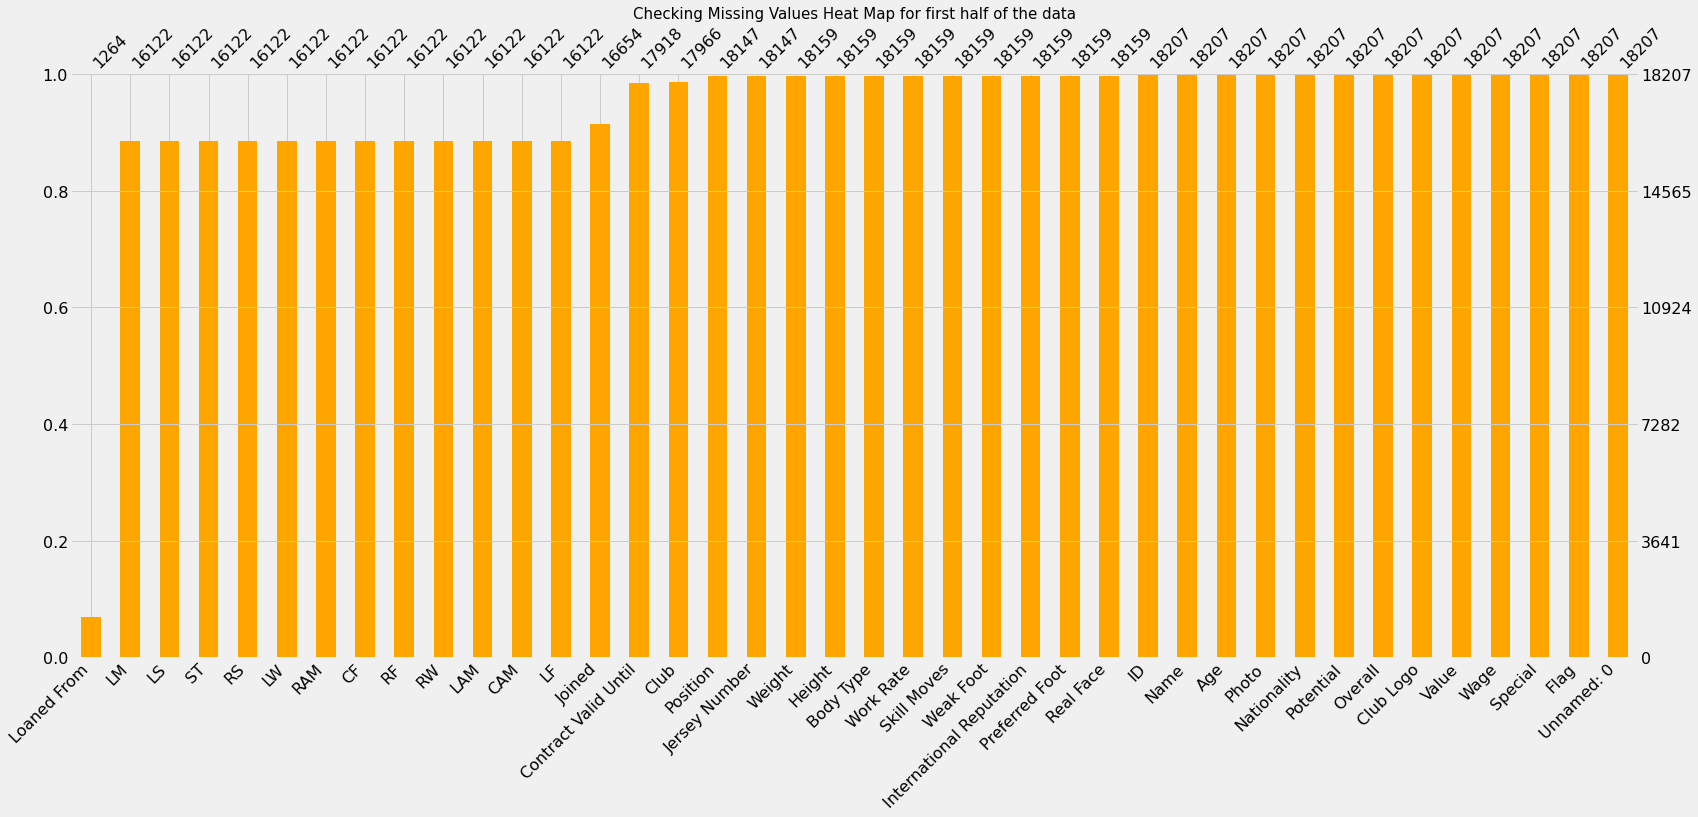

In [9]:
# checking if the data contains any NULL value
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, :40],
        color = 'orange',
        sort = 'ascending') 
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize = 15)
plt.show()

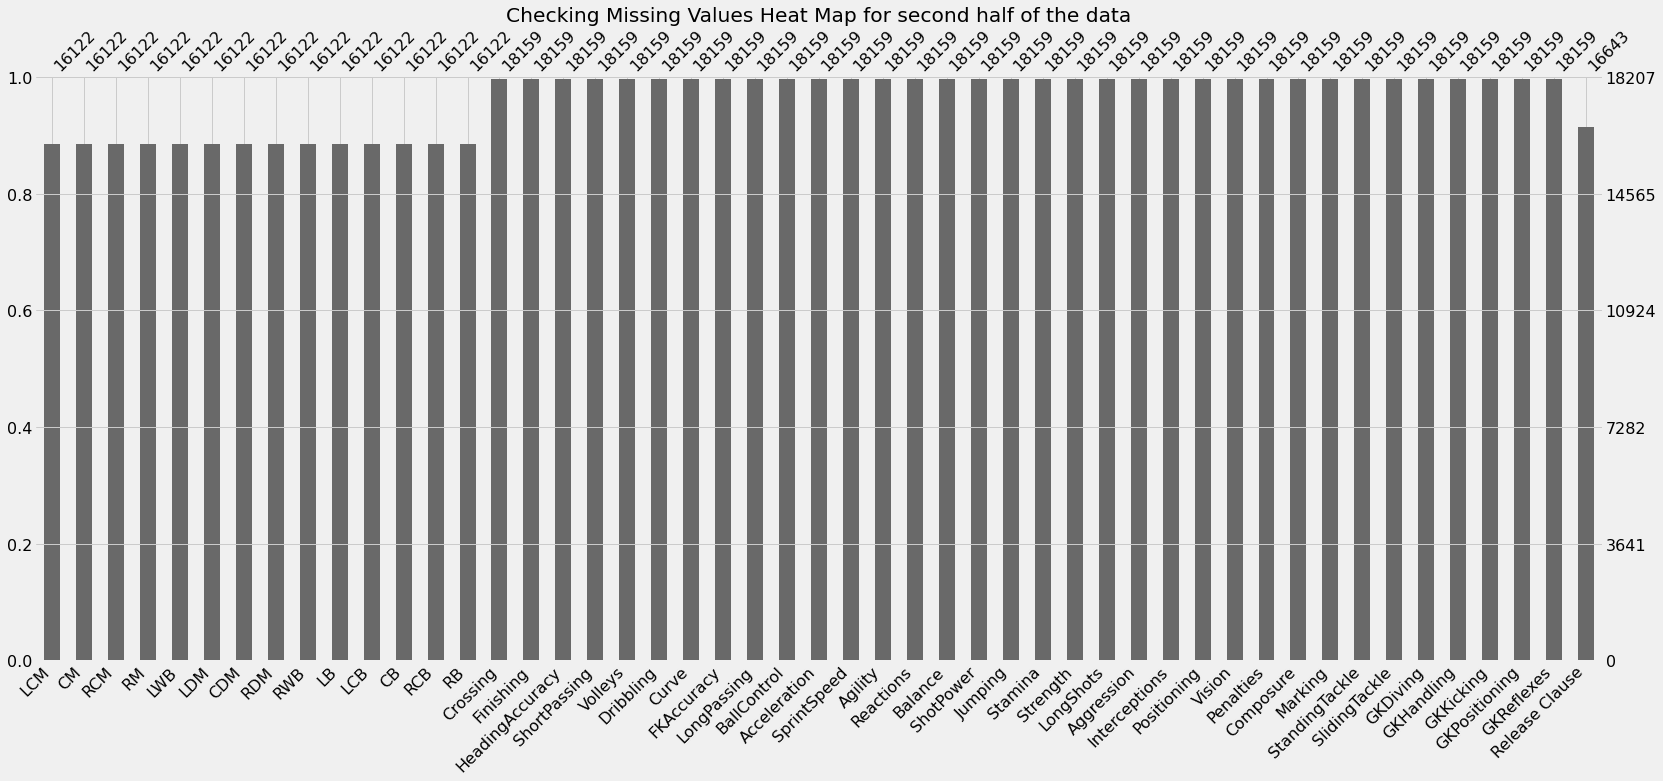

In [10]:
# Visualize missing values as a matrix 
mno.bar(data.iloc[:, 40:]) 
plt.title('Checking Missing Values Heat Map for second half of the data')
plt.show()

### Missing Values Imputation

In [27]:
numerical_col=data.select_dtypes(include=np.number)
numerical_col.columns[numerical_col.isnull().any()]

Index(['International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [29]:
categorical_col=data.select_dtypes(include='object')
categorical_col.columns[categorical_col.isnull().any()]

Index(['Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [31]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)

data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [32]:
pd.set_option('max_rows', 100)
data.isnull().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS        

In [33]:
# impute with 0 for rest of the columns
data.fillna(0, inplace = True)

# lets check whether the data still has any missing values
data.isnull().sum().sum()

0

## Feature Engineering

In [34]:
# creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [35]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

# lets check the column names in the data after adding new features
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [36]:
data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004        None                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018        None                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017        None                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011        None                 2020    6'4  168lbs     0     0   
4  Aug 30, 2015        None                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

## Data Visualization

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

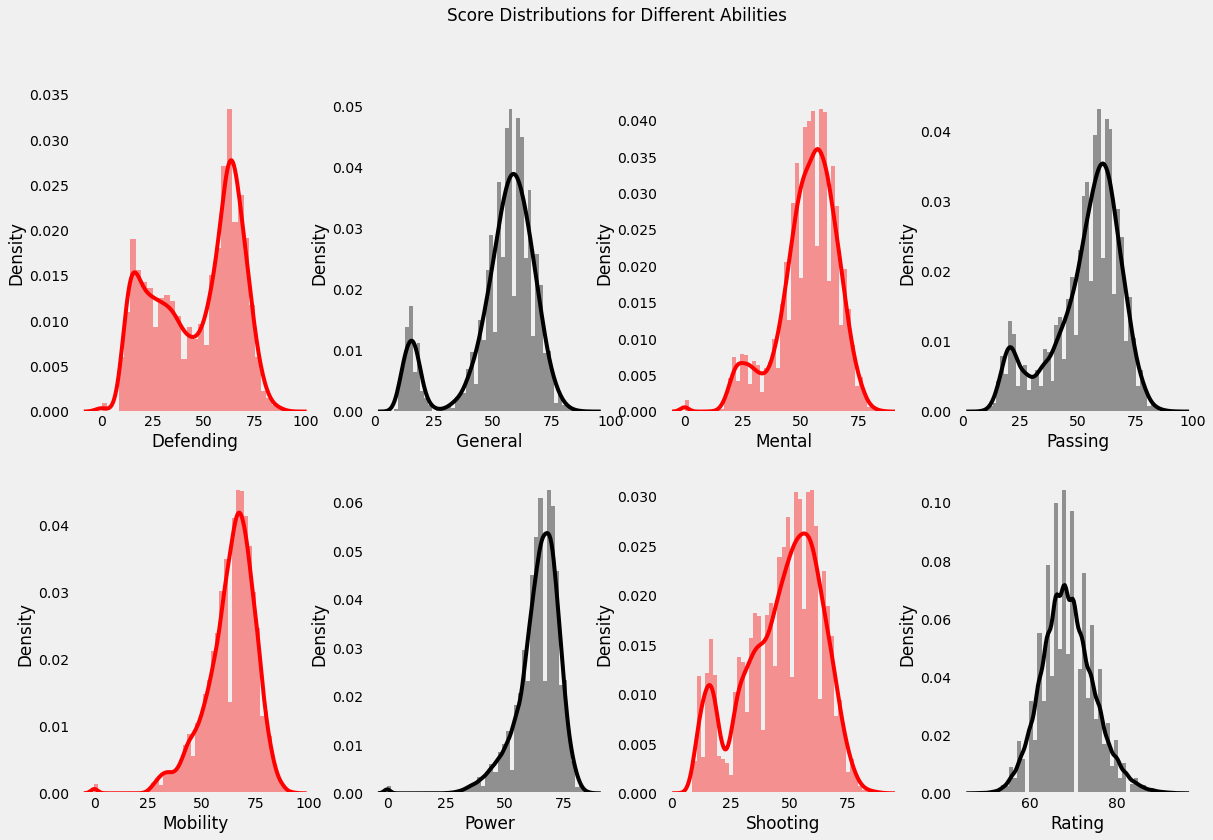

In [37]:
# lets check the Distribution of Scores of Different Skills

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


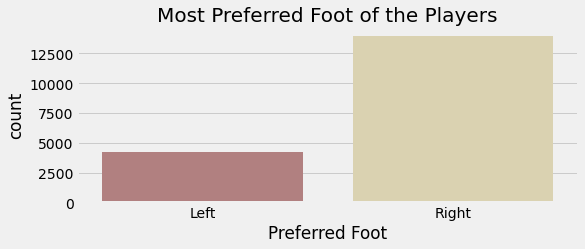

In [38]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

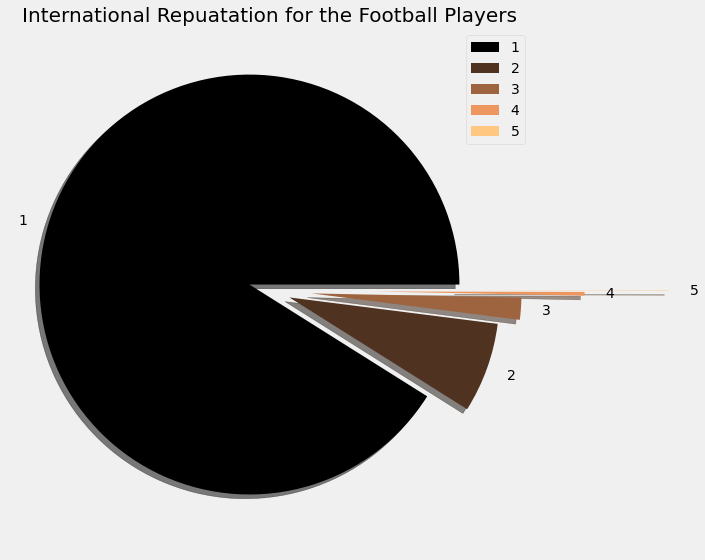

In [13]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']  #data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

**Let's check the Players with International Reputation as 5**

In [39]:
(data['International Reputation']==5).value_counts()

False    18201
True         6
Name: International Reputation, dtype: int64

In [40]:
data[data['International Reputation'] == 5][['Name','Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'magma')

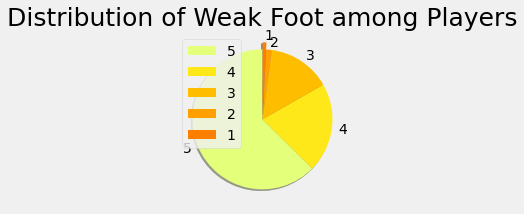

In [41]:
# plotting a pie chart to represent the share of weak foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Weak Foot among Players', fontsize = 25)
plt.legend()
plt.show()

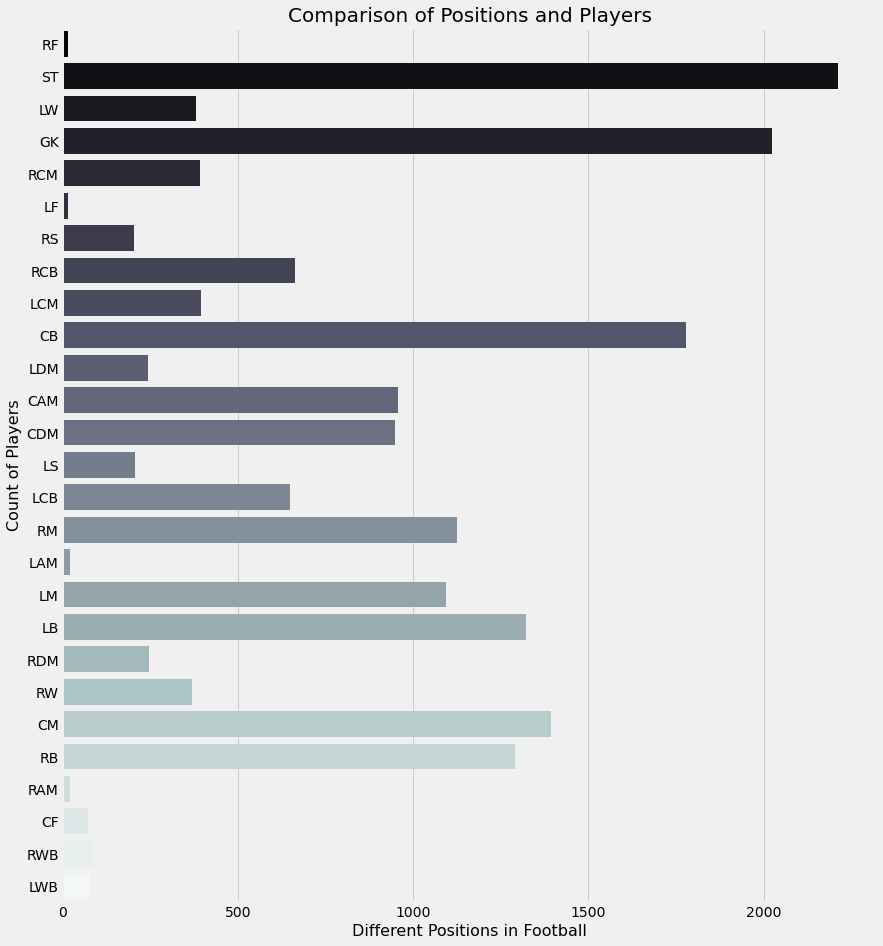

In [42]:
# different positions acquired by the players 

plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


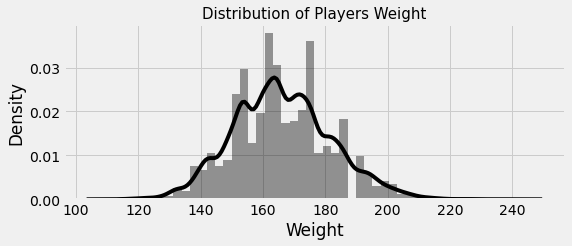

In [43]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

# plotting the distribution of weight of the players
sns.distplot(data['Weight'], color = 'black')
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

In [46]:
data['Value'].isna().any()

False

In [44]:
# defining a function for cleaning the wage column

def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


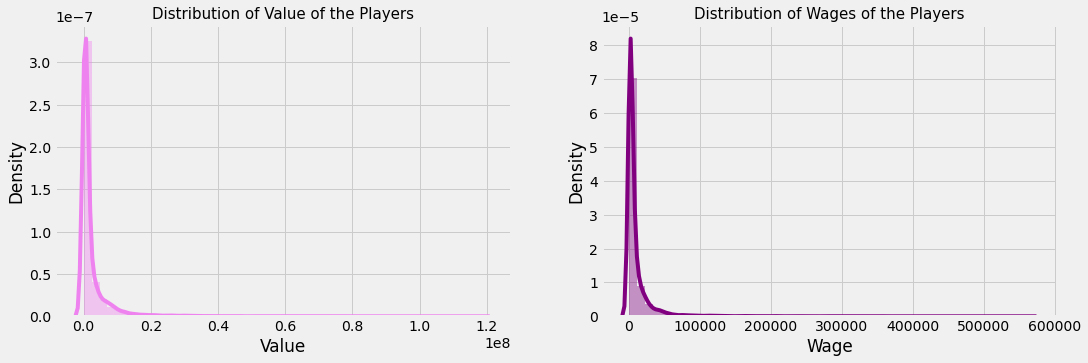

In [45]:
# applying the function to the wage and value column
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

# visualizing the data
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

In [47]:
data['Skill Moves'].median()

2.0

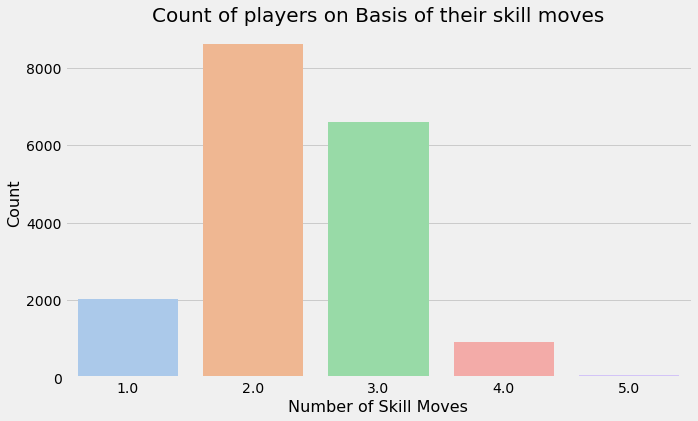

In [48]:
# Skill Moves of Players

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [50]:
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age','Nationality']]

Name  Age Nationality
25          K. Mbappé   19      France
1004        J. Sancho   18     England
1143  Vinícius Júnior   17      Brazil
2495      M. Ødegaard   19      Norway

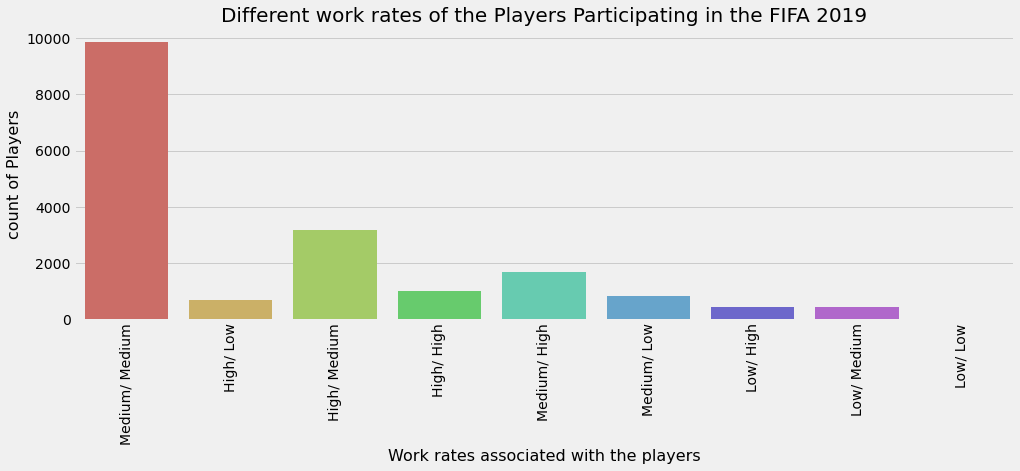

In [52]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


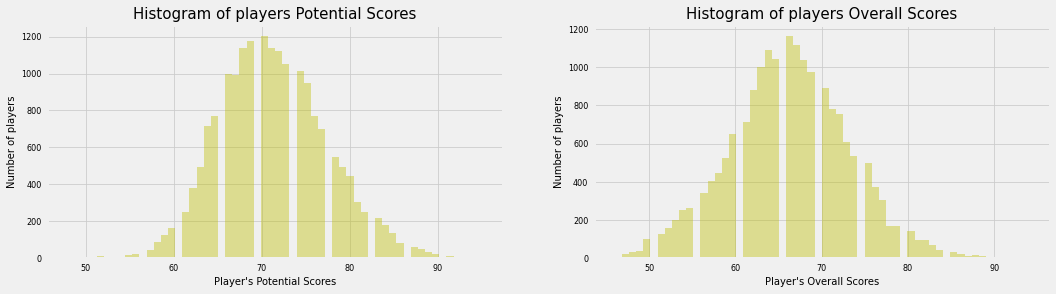

In [53]:
# To show Different potential scores of the players participating in the FIFA 2019

plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = data.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()

C:\Users\ANSHUL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


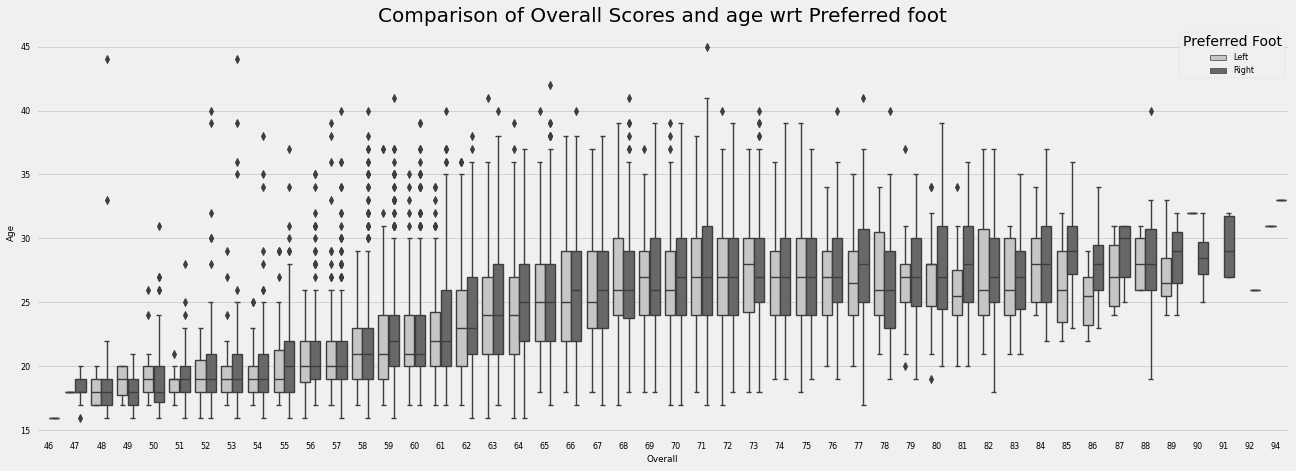

In [54]:
# violin plot 

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

**Countries with Most Players**

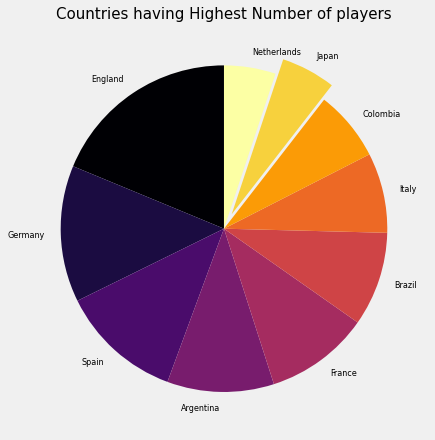

In [55]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                        startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

In [59]:
data_countries

Unnamed: 0      ID            Name  Age  \
0               0  158023        L. Messi   31   
2               2  190871       Neymar Jr   26   
3               3  193080          De Gea   27   
8               8  155862    Sergio Ramos   32   
11             11  182521        T. Kroos   28   
...           ...     ...             ...  ...   
18198       18198  242844      J. Livesey   18   
18202       18202  238813    J. Lundstram   19   
18204       18204  241638       B. Worman   16   
18205       18205  246268  D. Walker-Rice   17   
18206       18206  246269       G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
8      https://cdn.sofifa.org/players/4/19/155862.png       Spain   
11     https://cdn.sofifa.org/players/4/19/182521.png     Germany   
...                                               ...         ...   
18198  https://cdn.sofifa.org/players/4/19/242844.png     England   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
8      https://cdn.sofifa.org/flags/45.png       91         91   
11     https://cdn.sofifa.org/flags/21.png       90         90   
...                                    ...      ...        ...   
18198  https://cdn.sofifa.org/flags/14.png       47         70   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
8              Real Madrid    https://cdn.sofifa.org/teams/2/light/243.png   
11             Real Madrid    https://cdn.sofifa.org/teams/2/light/243.png   
...                    ...                                             ...   
18198        Burton Albion  https://cdn.sofifa.org/teams/2/light/15015.png   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

             Value      Wage  Special Preferred Foot  \
0      110500000.0  565000.0     2202           Left   
2      118500000.0  290000.0     2143          Right   
3       72000000.0  260000.0     1471          Right   
8       51000000.0  380000.0     2201          Right   
11      76500000.0  355000.0     2190          Right   
...            ...       ...      ...            ...   
18198      60000.0    1000.0      792          Right   
18202      60000.0    1000.0     1307          Right   
18204      60000.0    1000.0     1189          Right   
18205      60000.0    1000.0     1228          Right   
18206      60000.0    1000.0     1321          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                           5.0        4.0          4.0  Medium/ Medium   
2                       

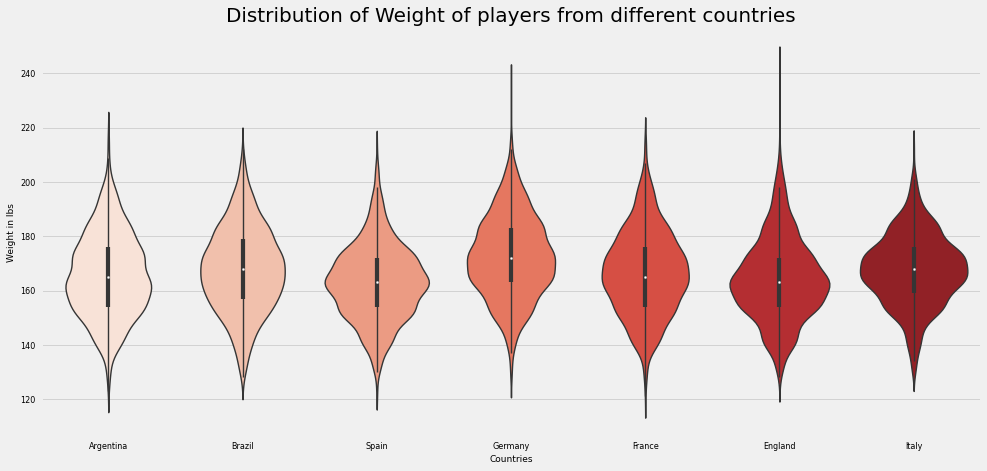

In [58]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

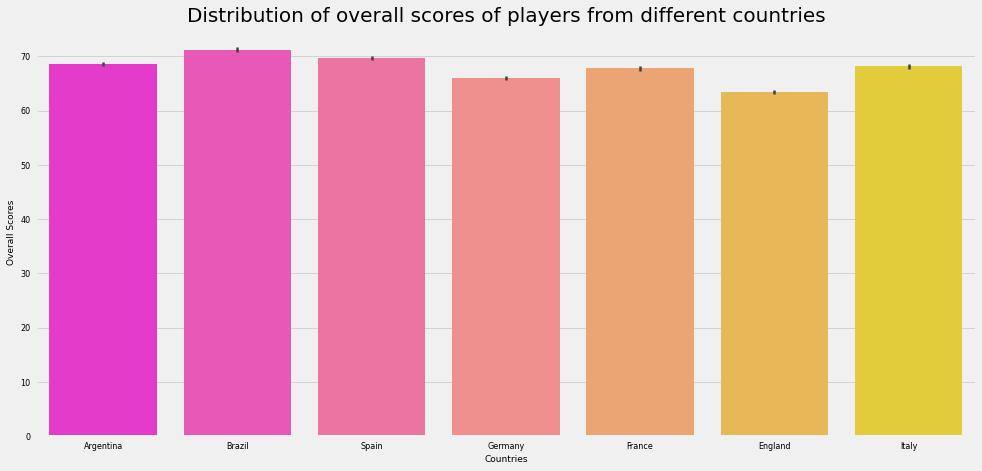

In [60]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

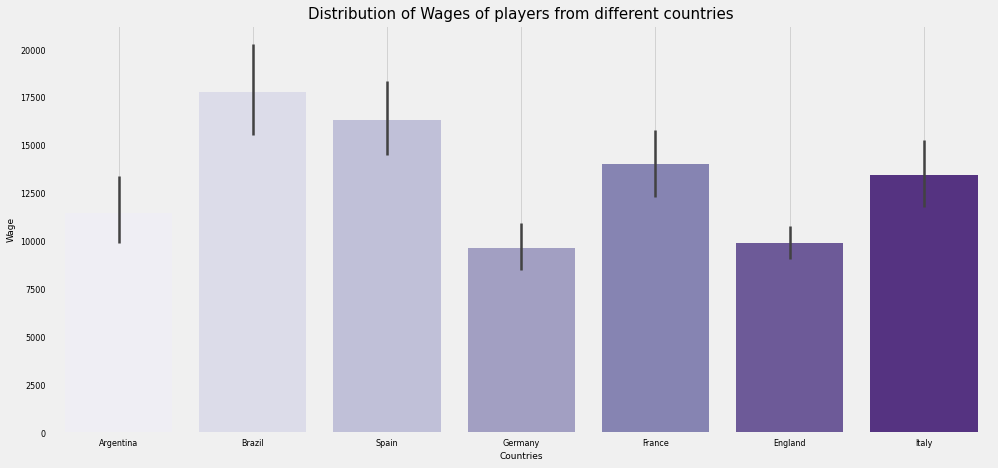

In [74]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.grid()
plt.show()

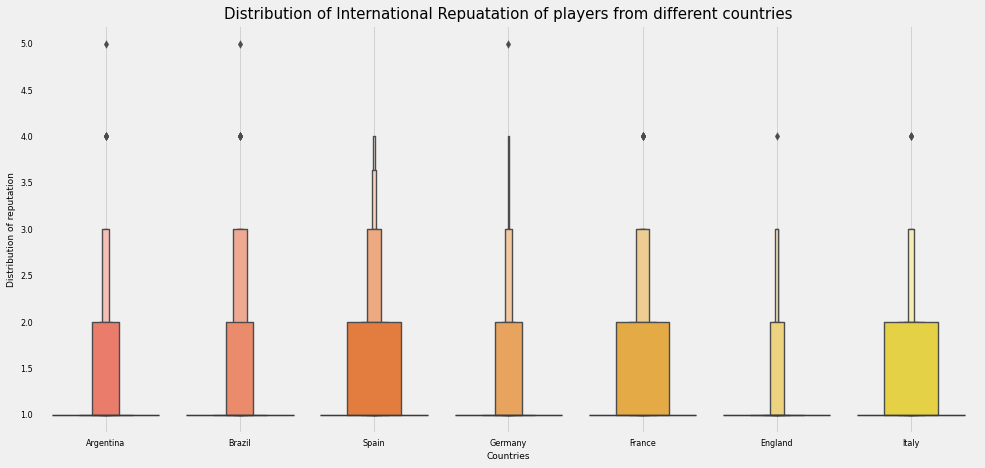

In [75]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries)]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.grid()
plt.show()

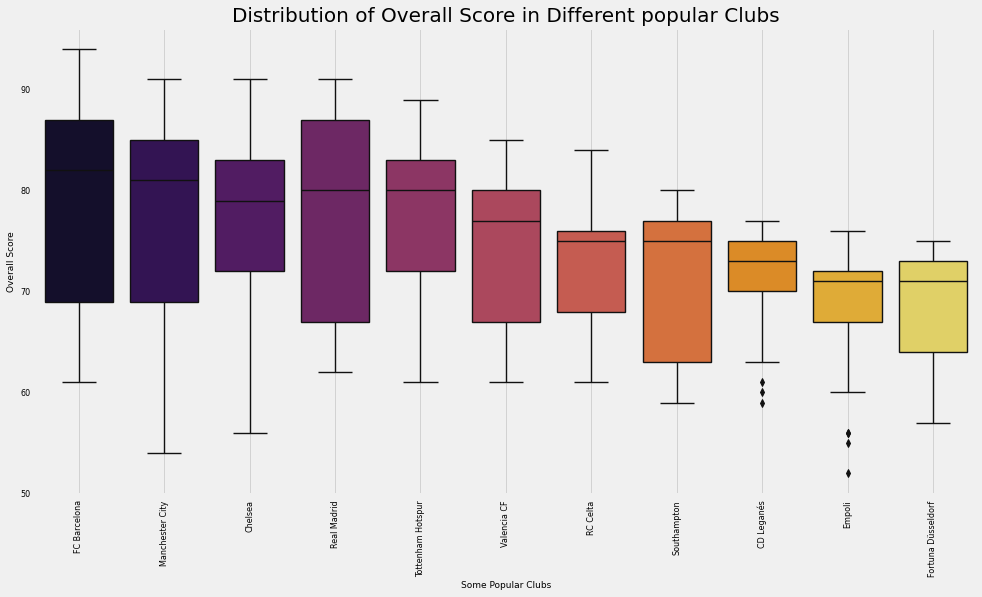

In [76]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs)]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

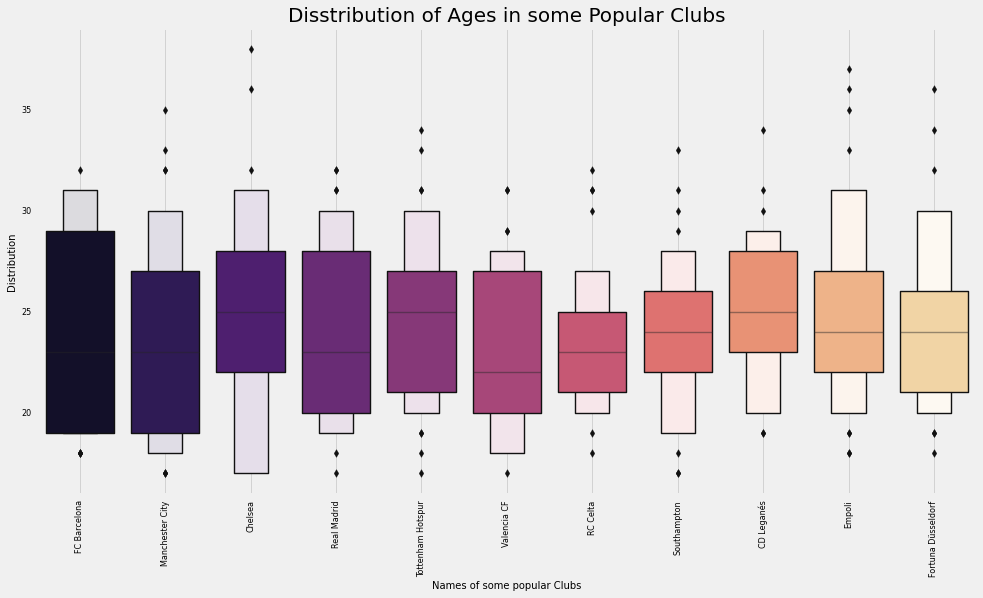

In [79]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) ]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()


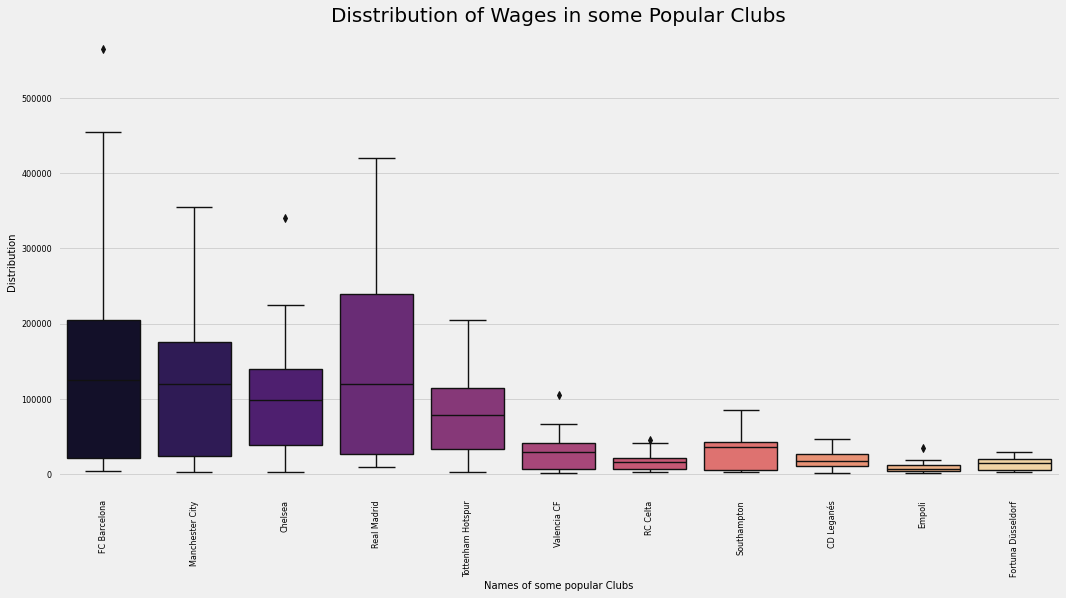

In [80]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) ]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

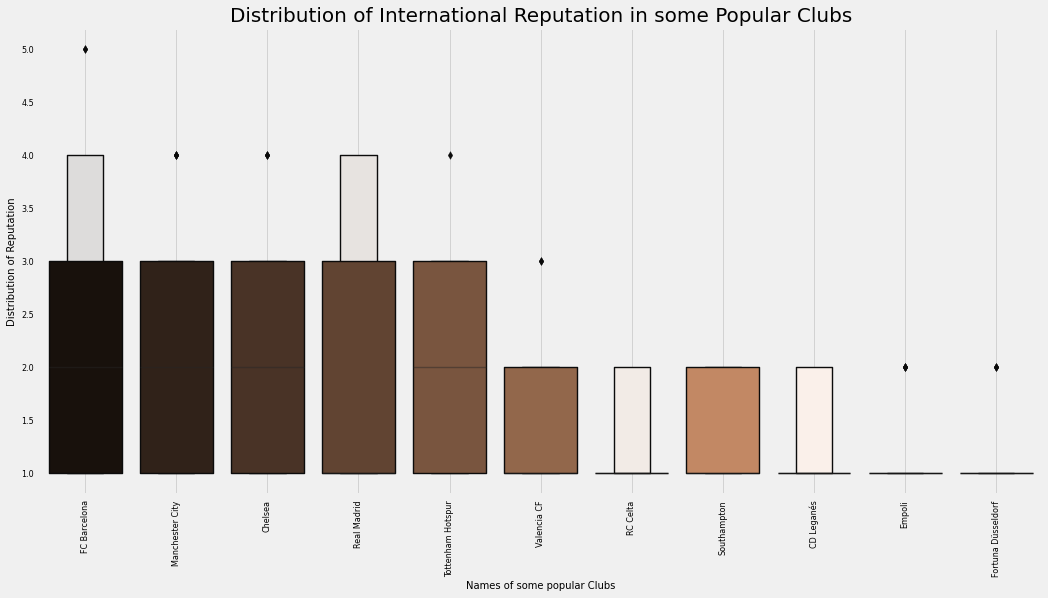

In [81]:
# Distribution of International Reputation in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchester City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs)]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## Query Analysis

**Best Players per each position with their age, club, and nationality based on their Overall Scores**

In [85]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [91]:
df=data.iloc[data.groupby(data['Position'])['Overall'].idxmax()]
df

Unnamed: 0      ID               Name  Age  \
17           17  194765       A. Griezmann   27   
12           12  182493           D. Godín   32   
20           20  189511    Sergio Busquets   29   
271         271  198706       Luis Alberto   25   
67           67  189509             Thiago   27   
3             3  193080             De Gea   27   
28           28  198710       J. Rodríguez   26   
35           35  176676            Marcelo   30   
24           24  138956       G. Chiellini   33   
11           11  182521           T. Kroos   28   
14           14  215914           N. Kanté   27   
5             5  183277          E. Hazard   27   
33           33  188567      P. Aubameyang   29   
21           21  179813          E. Cavani   31   
2             2  190871          Neymar Jr   26   
474         474  200536          N. Schulz   25   
129         129  193082        J. Cuadrado   30   
69           69  184432        Azpilicueta   28   
8             8  155862       Sergio Ramos   32   
4             4  192985       K. De Bruyne   27   
45           45  195864           P. Pogba   25   
0             0  158023           L. Messi   31   
25           25  231747          K. Mbappé   19   
7             7  176580          L. Suárez   31   
56           56  218667     Bernardo Silva   23   
450         450  207862          M. Ginter   24   
1             1   20801  Cristiano Ronaldo   33   

                                              Photo Nationality  \
17   https://cdn.sofifa.org/players/4/19/194765.png      France   
12   https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
20   https://cdn.sofifa.org/players/4/19/189511.png       Spain   
271  https://cdn.sofifa.org/players/4/19/198706.png       Spain   
67   https://cdn.sofifa.org/players/4/19/189509.png       Spain   
3    https://cdn.sofifa.org/players/4/19/193080.png       Spain   
28   https://cdn.sofifa.org/players/4/19/198710.png    Colombia   
35   https://cdn.sofifa.org/players/4/19/176676.png      Brazil   
24   https://cdn.sofifa.org/players/4/19/138956.png       Italy   
11   https://cdn.sofifa.org/players/4/19/182521.png     Germany   
14   https://cdn.sofifa.org/players/4/19/215914.png      France   
5    https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
33   https://cdn.sofifa.org/players/4/19/188567.png       Gabon   
21   https://cdn.sofifa.org/players/4/19/179813.png     Uruguay   
2    https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
474  https://cdn.sofifa.org/players/4/19/200536.png     Germany   
129  https://cdn.sofifa.org/players/4/19/193082.png    Colombia   
69   https://cdn.sofifa.org/players/4/19/184432.png       Spain   
8    https://cdn.sofifa.org/players/4/19/155862.png       Spain   
4    https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
45   https://cdn.sofifa.org/players/4/19/195864.png      France   
0    https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
25   https://cdn.sofifa.org/players/4/19/231747.png      France   
7    https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
56   https://cdn.sofifa.org/players/4/19/218667.png    Portugal   
450  https://cdn.sofifa.org/players/4/19/207862.png     Germany   
1     https://cdn.sofifa.org/players/4/19/20801.png    Portugal   

                                     Flag  Overall  Potential  \
17    https://cdn.sofifa.org/flags/18.png       89         90   
12    https://cdn.sofifa.org/flags/60.png       90         90   
20    https://cdn.sofifa.org/flags/45.png       89         89   
271   https://cdn.sofifa.org/flags/45.png       82         85   
67    https://cdn.sofifa.org/flags/45.png       86         86   
3     https://cdn.sofifa.org/flags/45.png       91         93   
28    https://cdn.sofifa.org/flags/56.png       88         89   
35    https://cdn.sofifa.org/flags/54.png       88         88   
24    https://cdn.sofifa.org/flags/27.png       89         89   
11    https://cdn.sofifa.org/flags/21.png       9

In [86]:
df.shape

(27, 97)

In [84]:
df.head()

Unnamed: 0      ID             Name  Age  \
17           17  194765     A. Griezmann   27   
12           12  182493         D. Godín   32   
20           20  189511  Sergio Busquets   29   
271         271  198706     Luis Alberto   25   
67           67  189509           Thiago   27   

                                              Photo Nationality  \
17   https://cdn.sofifa.org/players/4/19/194765.png      France   
12   https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
20   https://cdn.sofifa.org/players/4/19/189511.png       Spain   
271  https://cdn.sofifa.org/players/4/19/198706.png       Spain   
67   https://cdn.sofifa.org/players/4/19/189509.png       Spain   

                                    Flag  Overall  Potential  \
17   https://cdn.sofifa.org/flags/18.png       89         90   
12   https://cdn.sofifa.org/flags/60.png       90         90   
20   https://cdn.sofifa.org/flags/45.png       89         89   
271  https://cdn.sofifa.org/flags/45.png       82         85   
67   https://cdn.sofifa.org/flags/45.png       86         86   

                  Club                                     Club Logo  \
17     Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png   
12     Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png   
20        FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png   
271              Lazio   https://cdn.sofifa.org/teams/2/light/46.png   
67   FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png   

          Value      Wage  Special Preferred Foot  International Reputation  \
17   78000000.0  145000.0     2246           Left                       4.0   
12   44000000.0  125000.0     1946          Right                       3.0   
20   51500000.0  315000.0     2065          Right                       4.0   
271  28500000.0   67000.0     1941          Right                       2.0   
67   45500000.0  130000.0     2190          Right                       3.0   

     Weak Foot  Skill Moves       Work Rate Body Type Real Face Position  \
17         3.0          4.0      High/ High      Lean       Yes      CAM   
12         3.0          2.0    Medium/ High      Lean       Yes       CB   
20         3.0          3.0  Medium/ Medium      Lean       Yes      CDM   
271        3.0          4.0    High/ Medium      Lean       Yes       CF   
67         3.0          5.0  Medium/ Medium    Normal       Yes       CM   

     Jersey Number        Joined Loaned From Contract Valid Until Height  \
17             7.0  Jul 28, 2014        None                 2023    5'9   
12            10.0   Aug 4, 2010        None                 2019    6'2   
20             5.0   Sep 1, 2008        None                 2023    6'2   
271           10.0  Aug 31, 2016        None                 2022    6'0   
67            19.0  Jul 14, 2013        None                 2021    5'9   

     Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM  \
17    161.0  86+3  86+3  86+3  87+3  87+3  87+3  87+3  87+3  86+3  86+3  86+3   
12    172.0  64+3  64+3  64+3  61+3  62+3  62+3  62+3  61+3  62+3  62+3  62+3   
20    168.0  71+3  71+3  71+3  74+3  76+3  76+3  76+3  74+3  79+3  79+3  79+3   
271   163.0  77+2  77+2  77+2  82+2  82+2  82+2  82+2  82+2  84+2  84+2  84+2   
67    154.0  75+3  75+3  75+3  82+3  81+3  81+3  81+3  82+3  84+3  84+3  84+3   

       LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB  \
17   86+3  80+3  80+3  80+3  86+3  70+3  67+3  67+3  67+3  70+3  67+3  61+3   
12   63+3  68+3  68+3  68+3  63+3  76+3  81+3  81+3  81+3  76+3  79+3  87+3   
20   76+3  83+3  83+3  83+3  76+3  79+3  86+3  86+3  86+3  79+3  78+3  82+3   
271  82+2  79+2  79+2  79+2  82+2  60+2  59+2  59+2  59+2  60+2  54+2  44+2   
67   82+3  84+3  84+3  84+3  82+3  76+3  77+3  77+3  77+3  76+3  73+3  67+3   

       CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
17   61+3  61+3  67+3      82.0       90.0             84.0  

In [87]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'pink')

**Best Players for each Skill**

In [92]:
## Let's Analyze the Skills of Players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 
                       'Mobility', 'Power', 'Rating','Shooting'], score = 75):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                    ascending = False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

## Let's make a function to get the list of Top 15 Players from each Country

In [93]:
data['Nationality'].value_counts() 

England          1662
Germany          1198
Spain            1072
Argentina         937
France            914
                 ... 
New Caledonia       1
Lebanon             1
Kuwait              1
Belize              1
Puerto Rico         1
Name: Nationality, Length: 164, dtype: int64

In [95]:
# lets make an interactive function for getting a report of the players country wise

# lets make a function to see the list of top 15 players from each country
@interact
def country(country = list(data['Nationality'].value_counts().index)):
    return data[data['Nationality'] == country][['Name','Position','Overall',
                    'Potential']].sort_values(by = 'Overall',
                            ascending = False).head(30).style.background_gradient(cmap = 'magma')

interactive(children=(Dropdown(description='country', options=('England', 'Germany', 'Spain', 'Argentina', 'Fr…

## Let's make a function to get the list of Top 15  Players from each Club

In [96]:
data['Club'].value_counts()

No Club                      241
Atlético Madrid               33
Manchester United             33
Southampton                   33
Frosinone                     33
                            ... 
América FC (Minas Gerais)     20
Atlético Mineiro              20
Limerick FC                   19
Sligo Rovers                  19
Derry City                    18
Name: Club, Length: 652, dtype: int64

In [97]:
# lets make an interactive function to get the list of top 15 players from each of the club

# lets define a function 
@interact
def club(club = list(data['Club'].value_counts().index[1:])):
    return data[data['Club'] == club][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                     'Value','Contract Valid Until']].sort_values(by = 'Overall',
                                ascending  = False).head(15).style.background_gradient(cmap = 'inferno')

interactive(children=(Dropdown(description='club', options=('Atlético Madrid', 'Manchester United', 'Southampt…

**youngest Players from the FIFA 2019**

In [125]:
data['Age'].min()

16

In [128]:
data[data['Age']==16].shape


(42, 97)

In [111]:
data['Age'].max()

45

In [129]:
data[data['Age']==45].shape

(1, 97)

In [168]:
# finding 5 youngest Players from the dataset

youngest = data[data['Age'] == 16][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

**15 Eldest Players from FIFA 2019**

In [112]:
# finding 15 eldest players from the dataset

data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

**The longest membership in the club**

In [150]:
#data['Join_year'].dtype()

TypeError: 'numpy.dtype' object is not callable

In [158]:
#data['Join_year'] = data.Joined.dropna().map(lambda x: x.split('-'))

In [160]:
(data['Join_year'][0])

['Jul 1, 2004']

In [ ]:
data['Join_year'] = data['Join_year'].map(lambda x: x.split(','))

In [ ]:
#(data['Join_year'].split(","))

In [164]:
# The longest membership in the club

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap = 'Reds')

In [165]:
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = 'Years_of_member', 
          club = ['FC Barcelona', 'Real Madrid', 'Chelsea'], x = 4):
    return data[(data[column] > x) & (data['Club'] == club)][['Name', 'Club',
                                             'Years_of_member']].sort_values(by = 'Years_of_member',
                                                                ascending = False).style.background_gradient(cmap = 'magma')

interactive(children=(Text(value='Years_of_member', description='column'), Dropdown(description='club', option…

**Defining the features of players**

In [171]:
data.groupby(data['Position'])[player_features].mean()

<ipython-input-171-98a5b5d85087>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(data['Position'])[player_features].mean()


Acceleration  Aggression    Agility    Balance  BallControl  \
Position                                                                
CAM          70.680585   51.560543  72.637787  73.248434    68.479123   
CB           56.792463   64.822835  52.158605  54.853206    51.445444   
CDM          61.861814   68.577004  63.859705  65.697257    64.598101   
CF           73.324324   48.878378  74.608108  73.756757    67.837838   
CM           65.669297   60.507174  67.228838  69.761836    65.112626   
GK           38.320000   26.371852  40.201481  43.098272    19.949630   
LAM          73.142857   49.571429  76.952381  75.380952    73.000000   
LB           71.901664   63.483359  68.238275  69.210287    62.165658   
LCB          57.373457   69.885802  54.578704  55.057099    56.720679   
LCM          66.987342   65.567089  70.681013  70.767089    69.493671   
LDM          63.518519   67.954733  66.086420  66.736626    67.913580   
LF           77.133333   51.666667  79.733333  80.400000    76.000000   
LM           76.686758   50.802740  75.378082  74.114155    67.147032   
LS           71.700483   57.724638  69.888889  65.096618    68.845411   
LW           77.795276   48.811024  76.034121  73.795276    68.233596   
LWB          74.025641   63.102564  70.423077  69.987179    64.141026   
RAM          75.238095   52.047619  77.761905  77.095238    73.571429   
RB           72.398916   64.264136  68.190550  69.016266    62.222308   
RCB          56.811178   70.137462  53.820242  53.965257    56.052870   
RCM          66.657289   66.736573  69.792839  69.685422    69.278772   
RDM          63.637097   70.580645  65.895161  67.028226    67.875000   
RF           74.437500   55.437500  76.562500  74.375000    73.812500   
RM           76.818505   51.136121  74.927936  73.472420    66.764235   
RS           71.985222   57.246305  70.177340  66.241379    67.935961   
RW           78.027027   47.018919  75.867568  74.218919    68.181081   
RWB          73.448276   62.482759  69.022989  68.827586    62.011494   
ST           67.119801   50.658228  64.702984  62.516727    63.451959   

          Composure   Crossing  Dribbling  FKAccuracy  Finishing   GKDiving  \
Position                                                                      
CAM       63.111691  59.675365  68.109603   58.118998  59.442589  10.293319   
CB        56.271654  38.934196  42.337458   33.668166  29.512373  10.467942   
CDM       61.020042  52.126582  59.481013   48.233122  44.408228  10.619198   
CF        60.959459  54.797297  68.675676   52.797297  64.608108   9.432432   
CM        59.914634  54.666428  62.634864   51.428264  49.896700  10.368006   
GK        45.122469  14.257284  13.856296   14.464198  12.016296  65.323951   
LAM       69.857143  69.285714  73.047619   60.523810  63.714286  11.285714   
LB        58.137670  63.408472  61.595310   45.563540  39.929652  10.683812   
LCB       61.989198  44.083333  47.300926   36.373457  32.305556  10.598765   
LCM       66.027848  60.339241  66.637975   57.432911  55.701266  10.655696   
LDM       64.995885  57.251029  63.794239   53.979424  50.666667  10.465021   
LF        70.133333  67.533333  76.666667   61.400000  69.333333  10.466667   
LM        60.457534  62.719635  68.619178   52.791781  59.407306  10.459361   
LS        65.333333  53.415459  67.753623   49.318841  69.879227  10.628019   
LW        60.847769  61.377953  69.792651   51.417323  61.826772  10.451444   
LWB       59.410256  64.461538  62.512821   48.256410  42.576923  10.666667   
RAM       68.380952  68.428571  73.714286   64.333333  63.095238  11.142857   
RB        58.254841  62.547637  61.237026   41.298218  39.658404  10.479473   
RCB       61.634441  41.660121  46.235650   35.833837  32.299094  10.524169   
RCM       66.235294  60.232737  66.171355   55.882353  55.375959  10.693095   
RDM       65.838710  56.556452  63.395161   52.084677  51.241935  10.745968   
RF        70.000000  68.500000  72.937500   63.562500  70.437500  10.500000

In [174]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

<ipython-input-174-3a3ceec6e198>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():


**Top 10 left footed footballers**

In [172]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'bone')

**Top 10 Right footed footballers**

In [173]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')


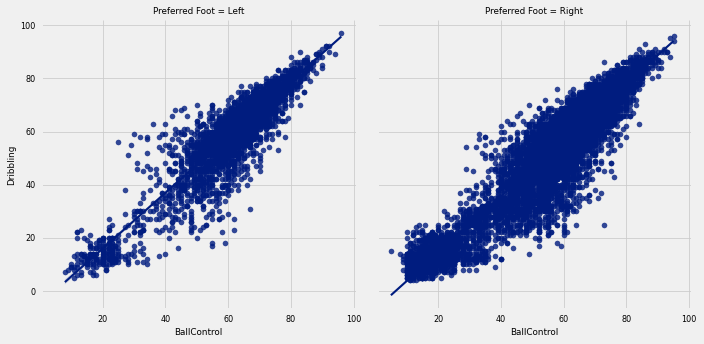

In [175]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()
